In [ ]:
import pandas as pd

# Load the two datasets
scores_df = pd.read_csv("final_combined_DATA_scores.csv")
income_df = pd.read_csv("bank_net_income_2024.csv")



In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## Merge the scores with the cleaned net income data
merged_df = pd.merge(scores_df, income_df, on='bank_name')

# Perform the regression and calibration for each subcategory
import statsmodels.api as sm

calibrated_scores = {}
for sub in ['Data', 'Analytics', 'Technology', 'Analog']:
    sub_df = merged_df[merged_df['sub_category'] == sub].copy()
    X = sm.add_constant(sub_df['2024 Net Income'])
    y = sub_df['final_score']

    model = sm.OLS(y, X).fit()
    sub_df.loc[:, f'{sub}_calibrated_score'] = model.predict(X)
    calibrated_scores[sub] = sub_df[['bank_name', f'{sub}_calibrated_score']].set_index('bank_name')

# Combine the calibrated scores into one DataFrame
result_df = pd.concat(calibrated_scores.values(), axis=1).reset_index()

# Normalize calibrated scores to 1–5 range
#scaler = MinMaxScaler(feature_range=(1, 5))
#score_cols = ['Data_calibrated_score', 'Analytics_calibrated_score',
              #'Technology_calibrated_score', 'Analog_calibrated_score']

result_df[score_cols] = scaler.fit_transform(result_df[score_cols])

# Export to CSV
output_path = "calibrated_ILB_scores.csv"
result_df.to_csv(output_path, index=False)

output_path


'calibrated_ILB_scores.csv'

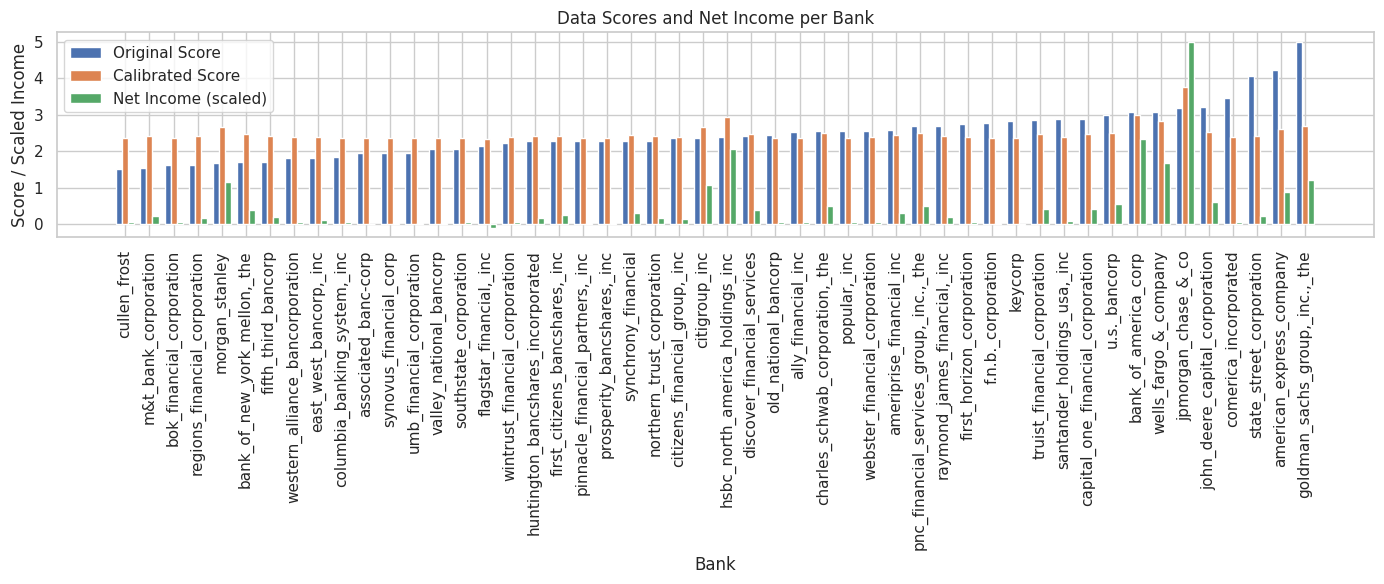

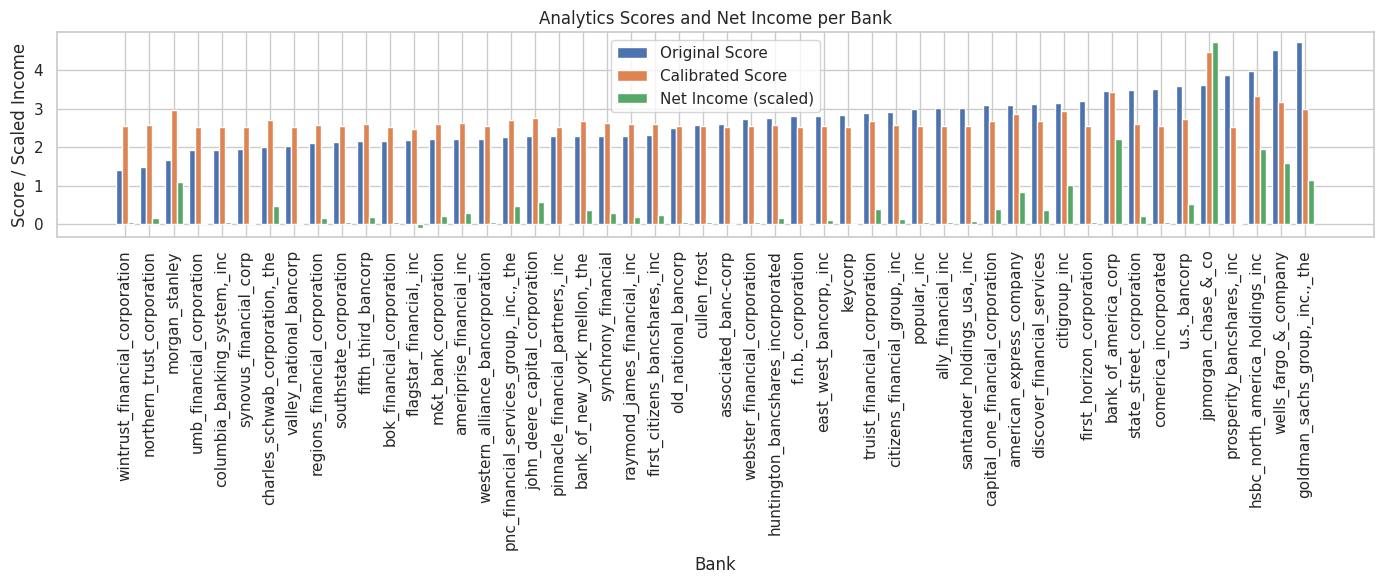

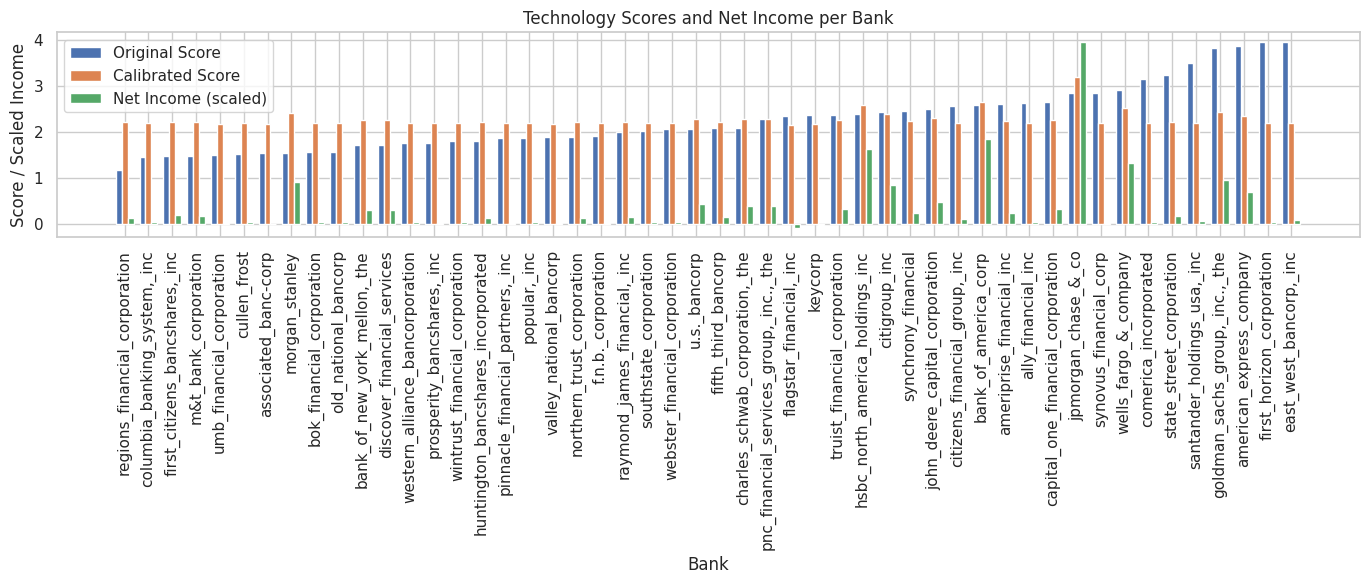

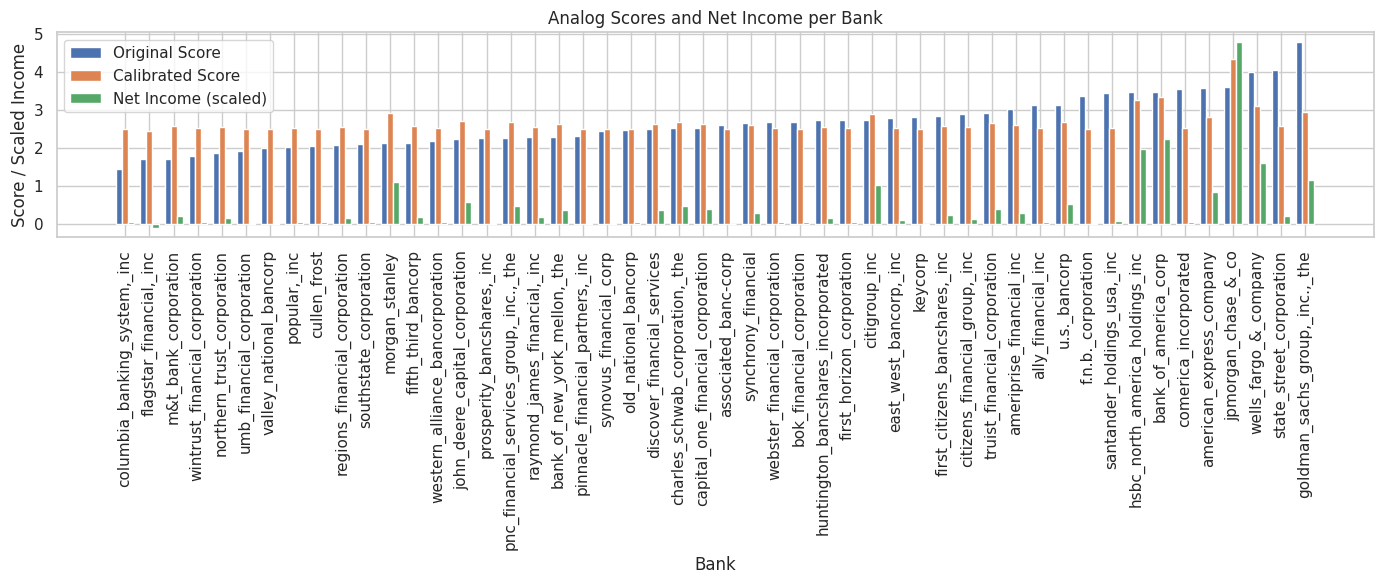

In [ ]:
# Plot: Initial score, Calibrated score, and Net Income as bars per bank for each subcategory
for sub in subcategories:
    df = all_sub_df[all_sub_df['Subcategory'] == sub].sort_values(by='final_score')
    plt.figure(figsize=(14, 6))
    bar_width = 0.25
    index = np.arange(len(df))

    # Normalize net income for plotting on similar scale
    normalized_income = df['2024 Net Income'] / df['2024 Net Income'].max() * df[['final_score', f'{sub}_calibrated_score']].max().max()

    # Plot all bars
    plt.bar(index, df['final_score'], bar_width, label='Original Score')
    plt.bar(index + bar_width, df[f'{sub}_calibrated_score'], bar_width, label='Calibrated Score')
    plt.bar(index + 2 * bar_width, normalized_income, bar_width, label='Net Income (scaled)')

    plt.xticks(index + bar_width, df['bank_name'], rotation=90)
    plt.title(f'{sub} Scores and Net Income per Bank')
    plt.xlabel('Bank')
    plt.ylabel('Score / Scaled Income')
    plt.legend()
    plt.tight_layout()
    plt.show()
